## Imports

In [9]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import sklearn 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## About Data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = pd.read_csv('/content/drive/MyDrive/data_for_colab/all_data.csv', lineterminator='\n')
df.head()

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [12]:
df

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [13]:
df=df.take(np.random.permutation(len(df))[:])

In [14]:
df=df.reset_index(drop=True)

In [15]:
df[df.isnull().any(axis=1)].head()

,id,dialect,text


In [16]:
np.sum(df.isnull().any(axis=1))

0

In [17]:
df.nunique()

id         458197
dialect        18
text       458197
dtype: int64

In [18]:
df.isnull().any(axis=0)

id         False
dialect    False
text       False
dtype: bool

In [19]:
df.shape

(458197, 3)

In [20]:
df.isna().sum()

id         0
dialect    0
text       0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


### normalize text

In [22]:

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


In [23]:
def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,'#')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", "#", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', '#', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def normalize_tweet(text):
    new_text = text.lower()
    #new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    #new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
#    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    
    return new_text


In [24]:
df['text'] = df['text'].apply(normalize_tweet)
df

,id,dialect,text
0,308180551515402240,QA,لا ما يحتاااي هههههههه
1,1016322419718590464,SD,عندنا حروب بس منفتحين ع العالم ما مقفولين في م...
2,988081421926457216,PL,بالعكس لو راح الفجيرة يضمن يلعب اساسي ويضمن اس...
3,471376178335739904,LY,اسمط شيء لما تكتب حاجه طويله ع الكيبورد وتقعد ...
4,893230415762391040,SD,قالو لا
...,...,...,...
458192,1143448226324013056,PL,اي والله طول عمرهم هيك
458193,972401837323313152,LY,الحقيقه نحب نسمع أغانيها ومانحبهاش هيا
458194,1030242527285264384,QA,يمكن فيها الدوره الشهريه سامحها هرمونات
458195,1172064292717367296,KW,الشر ما اييج طال عمرج


In [66]:
text_test = "765%$$#صباح الفل"
text_test = normalize_tweet(text_test)
text_test

'صباح الفل'

# Word Frequencies


In [25]:
tweets = df.text.str.cat(sep=' ')
tweets

In [ ]:
import nltk
nltk.download('punkt')

In [27]:
import nltk
from nltk.tokenize import word_tokenize
#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

468859


['من',
 'ما',
 'في',
 'و',
 'اللي',
 'الله',
 'بس',
 'على',
 'يا',
 'كل',
 'مش',
 'انا',
 'ولا',
 'لا',
 'والله',
 'لو',
 'شي',
 'مع',
 'انت',
 'ان']

# Unigrams by Counts

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
def top_n_words(corpus, n=None):

    cv = CountVectorizer(stop_words= stopwords.words("arabic")).fit(corpus) 
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'], 25)
for word, count in common_words:
    
    print(word, count)
df_unigrams = pd.DataFrame(common_words,columns = ['word' , 'count'])
df_unigrams.head(30)


اللي 59777
الله 49766
مش 31211
انا 30472
والله 24798
شي 19813
انت 16867
ان 16348
عشان 13426
الناس 13361
يعني 13312
الي 12138
علي 12071
مو 11939
اذا 11396
او 11330
ده 10674
اي 10324
يوم 10013
شو 9769
انه 9584
ليش 8460
وين 8452
الا 8167
لازم 8043


,word,count
0,اللي,59777
1,الله,49766
2,مش,31211
3,انا,30472
4,والله,24798
5,شي,19813
6,انت,16867
7,ان,16348
8,عشان,13426
9,الناس,13361


In [30]:
import cufflinks as cf
#configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_unigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 20 unigrams in text')

# Bigrams By counts


In [31]:
def top_n_words(corpus, n=None):
    cv = CountVectorizer(stop_words= stopwords.words("arabic"),ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'], 20)
#for word, count in common_words:
    
    #print(word, count)
df_bigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_bigrams.head(10)

,word,count
0,شاء الله,5607
1,ان شاء,3405
2,الله يبارك,1593
3,حسبي الله,1318
4,الناس اللي,1280
5,مش عارف,1259
6,زد رصيدك,1152
7,يبارك فيك,1096
8,الحمد لله,1058
9,اهم شي,956


In [32]:
import cufflinks as cf
#configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_bigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 100 bigrams in text')

# Trigrams By Counts


In [33]:
def top_n_words(corpus, n=None):
    vect = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'],20)
#for word, count in common_words:
    
    #print(word, count)
df_trigram = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_trigram.head(20)
#df_trigram.to_excel('df_trigram.xlsx')

,word,count
0,ان شاء الله,3333
1,ما شاء الله,971
2,الله ونعم الوكيل,903
3,الله يبارك فيك,853
4,إن شاء الله,652
5,حسبي الله ونعم,580
6,وان شاء الله,400
7,من كثر ما,300
8,قوة الا بالله,225
9,كل عام وانت,221


In [34]:
df_trigram.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in text')

# Stop Words

In [ ]:
# stop = stopwords.words('arabic')
# #words = set(nltk.corpus.words.words())
# arab_stopwords = set(nltk.corpus.stopwords.words("arabic"))
# arab_stopwords

In [ ]:
# arab_stopwords = r'\b(?:{})\b'.format('|'.join(arab_stopwords))
# arab_stopwords

In [ ]:
# df['text']=df['text'].str.replace(arab_stopwords, '')
# df['text'].tail(10)

## **remove repeating char**

In [35]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [36]:
df["text"] = df['text'].apply(lambda x: remove_repeating_char(x)) # apply used to call the method processpost

In [70]:
text_test = "صبااااااااااح الفلللللللللللل"
text_test =remove_repeating_char(text_test)
text_test

'صباح الفل'

# Tokenize Word and Sentence


In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
sentences = df.iloc[30]
sentences['text']
print (nltk.sent_tokenize(sentences['text']))
print('*********************************')
print (nltk.word_tokenize(sentences['text']))

['هو حد لاقي ياكل اليومين دول وبعدين حد في الجنة بيجوع ولا بيبرد']
*********************************
['هو', 'حد', 'لاقي', 'ياكل', 'اليومين', 'دول', 'وبعدين', 'حد', 'في', 'الجنة', 'بيجوع', 'ولا', 'بيبرد']


In [72]:
df.iloc[0]

id         308180551515402240
dialect                    12
text            لا ما يحتاي ه
Name: 0, dtype: object

In [39]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [40]:
df["text"] = df['text'].apply(lambda x: remove_repeating_char(x)) # apply used to call the method processpost

In [73]:
sentences2 = text_test
nltk.word_tokenize(sentences2)

['صباح', 'الفل']

In [74]:
sentences2

'صباح الفل'

# Stemmer

In [ ]:
# pip install nltk

In [ ]:
# import nltk.stem as stemmer

In [ ]:
# pip install tashaphyne

     |████████████████████████████████| 251 kB 5.2 MB/s 
     |████████████████████████████████| 126 kB 33.2 MB/s 


In [ ]:
# #Tashaphyne is an Arabic light stemmer and segmentor. 
# from tashaphyne.stemming import ArabicLightStemmer
# ArListem = ArabicLightStemmer()

#  # stemming word
# stem = ArListem.light_stem(sentences['text'])
#  # extract stem
# print (ArListem.get_stem())
# print('\n')
#  # extract root
# print (ArListem.get_root())
# print('\n')
# print (ArListem.get_prefix())
# print('\n')
# print (ArListem.get_suffix())

نتبرع بفلوس و نشتري من البضاعه الي ما تضرت اكل و شراب و اثاث و لباس الي موجود


نتبرع بفلس  نشتر من لبضعه ل م تضرت كل  شرب  ثث  لبس ل مجد


نت





In [ ]:
df

,id,dialect,text
0,148684060628238336,QA,"يا رب أشفي الشيخ عبدالرحمن السميط وطول بعمره:""..."
1,1082017983252320384,SA,@XandY_87 نشهر فيها!!!\nليه شايفتني ناشر مقاطع...
2,549594850220195840,PL,@WMpalestine @AssafMa442 @MohammedAssaf89 القم...
3,1082579117994885248,BH,شباب مهنا شوي و يوصل ١٠ الاف مشترك\nنبيه يوصل ...
4,1071049862488182784,JO,@a7mad_mas كل الحسابات الوهمية بكفة وهالحسابين...
...,...,...,...
458192,1177290353470267392,LB,ارجع شي عشرين سنة لورا #مين_ما_بيحلم
458193,1175418097819422720,SD,@zooldonia @reemsalah999 ماشالله مابتظبط معاك ...
458194,1099002194832048000,JO,@921Meno هو الحق مش عليه !!\nالحق علي المتابعي...
458195,947059452091555840,QA,@Ealnuaimi3 @Hussein_Musleh @nonyal3 @khomene1...


In [ ]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
for a in word_tokenize(sentences['text']):

    print(st.stem(a))

# Bag Of Word


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(df['text'])

CountVectorizer()

In [42]:
doc_array = count_vector.transform(df['text'][:1000]).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
frequency_matrix = pd.DataFrame(doc_array,index=df['text'][:1000],columns=count_vector.get_feature_names())
frequency_matrix.head()

,ءاتها,ءاتيه,ءادم,ءال,ءاله,ءالوجع,ءرءتو,ءع,ءلى,ءمن,...,يويلتاه,يويلكم,يويلي,يوينك,يويو,يويوم,يويوي,يويويويوي,يويويويويوي,يىجعوا
text,,,,,,,,,,,,,,,,,,,,,
يعني حضرتك كنت متوقع ان زوجة الإنتحاري هتعترف بأسباب تشده وتكفيره لمجتمع ومين الي بيموله ويدربه على المتفجرات,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
اي جرب لن تندم و تشتري ثياب قصدي ربع نقوه عيونك,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
النبي شكل مراتك عاملة اكاونت هنا و إنت بتكتب تحت تهديد السلاح,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
معظم الحمير حاطين حوافرهم تحت حناكاتهم ويرجو فى كوبلر يغرد حشا الى مايخاف الا ربه,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
المشكله ان كل الي بيكلمو ف انتحار دول اندر ايدج اصلا ومعرفوش الفرق بين النضج والبلوغ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF IDF


In [43]:
# converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'][:1000]).toarray()
df_tf = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names())
df_tf.head(5)

,آبل,آخر,آفا,آل,آمال,آه,آيه,أبرك,أبسط,أبطى,...,يوفقك,يوقفو,يوقفون,يوم,يومه,يومي,يوميا,يومين,يونيو,يويل
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Cloud


In [ ]:
pip install arabic-reshaper

In [ ]:
pip install python-bidi

In [ ]:
pip install wordcloud

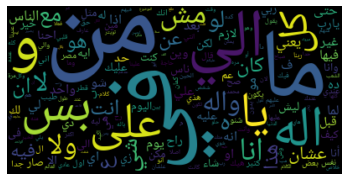

In [ ]:
text=df['text']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

font_file = '/content/NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create a WordCloud 
import arabic_reshaper
# Politic_df = df[(df['categorie']=='السياسة')]

# long_string = ','.join(list(Politic_df.text.values))

# reshaped_text = arabic_reshaper.reshape(long_string)
# bidi_text = get_display(reshaped_text)
# wordcloud = WordCloud(stopwords=arab_stopwords,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
# plt.imshow(wordcloud, interpolation= None)
# plt.axis("off")
# plt.show()

# Count Vectorizer


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['text'])

# Long Short Term Memory (LSTM)
# Data Preparation and Pad text Data

In [45]:
from sklearn import preprocessing

In [46]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(df['dialect'])
df['dialect'] = encpro

In [47]:
X=df['text'].values
y=df['dialect'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 366557
Test Data: 91640


In [48]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text,sequence
max_features=10000
#which is set to 10000. This is because when you convert words to numbers using the bag of words approach, 
#all the unique words in all the documents are converted into features. 
#All the documents can contain tens of thousands of unique words.
#But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. 
#Therefore we set the max_features parameter to 10000, which means that we want to use 10000 most occurring words as features for training our classifier.
max_text_length=20


x_tokenizer=Tokenizer(max_features)

In [49]:
x_tokenizer.fit_on_texts(X)
word_index = x_tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 429127 unique tokens.


In [50]:
import collections
print('Top 5 most common words are:', collections.Counter(x_tokenizer.word_counts).most_common(5))

Top 5 most common words are: [('من', 100077), ('ما', 75004), ('في', 72948), ('الي', 71975), ('و', 64455)]


In [51]:
#text to numbers
#return each text by sequence of integers ,each integer be the index of token in dictionary
x_train=x_tokenizer.texts_to_sequences(X_train) 
x_train_val=sequence.pad_sequences(x_train,padding='post',maxlen=max_text_length)
x_test=x_tokenizer.texts_to_sequences(X_test) 
x_test_val=sequence.pad_sequences(x_test,padding='post',maxlen=max_text_length)

In [52]:
X_train[6]

'منور كابتن بس جنه الجسم خذا بالعرض'

In [53]:
x_train_val[32]

array([  69, 6780,   98,    5,   55, 6479, 1923, 8904, 4458, 1240,  570,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [54]:
from keras.preprocessing.sequence import pad_sequences

In [55]:
max_fatures = 20000
tokenizer = Tokenizer(num_words = max_fatures , split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

In [56]:
y = pd.get_dummies(df['dialect']).values

In [59]:
import tensorflow as tf

In [60]:
model = tf.keras.models.load_model('/content/drive/MyDrive/data_for_colab/keras.h5')

In [61]:
def prediction(text):
    label_encodding = {
    0:"AE" , 
    1:"BH" ,
    2:"DZ",
    3:"EG",
    4:"IQ",
    5:"JO",
    6:"KW",
    7:"LB",
    8:"LY",
    9:"MA",
    10:"OM",
    11:"PL",
    12:"QA",
    13:"SA",
    14:"SD",
    15:"SY",
    16:"TN",
    17:"YE"}
    tweet = preprocess_text(tweet)
    tweet = embedding([tweet])
    print(model.predict(tweet))
    pred = model.predict(tweet)
    classes_x = np.argmax(pred,axis=1)
    print(classes_x)
    return (label_encodding.get(classes_x[0]))

In [ ]:
embed_dim = 128
gru_out = 196

In [ ]:
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import tensorflow as tf

In [ ]:
embed_dim = 128
gru_out = 196
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))

model.add(SpatialDropout1D(0.4))
model.add(GRU(gru_out, dropout=0.2, recurrent_dropout=0.2))


model.add(tf.keras.layers.Dense(64 , activation='relu'))


model.add(Dense(18,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 87, 128)           2560000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 87, 128)          0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 196)               191688    
                                                                 
 dense (Dense)               (None, 64)                12608     
                                                                 
 dense_1 (Dense)             (None, 18)                1170      
                                                                 
Total params: 2,765,466
Trainable params: 2,765,466
Non-trainable params: 0
______________________________________________

In [ ]:
Y = pd.get_dummies(df['dialect']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.02, random_state = 42 , shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(449033, 87) (449033, 18)
(9164, 87) (9164, 18)


In [ ]:
# Creat checkpoint to save model at the end of each epoch:
import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs = 15 , validation_split = 0.01 , callbacks=[checkpoint_cb, early_stopping_cb], batch_size = 2000)

Epoch 1/15
223/223 [==============================] - 1616s 7s/step - loss: 2.2646 - accuracy: 0.2757 - val_loss: 1.8259 - val_accuracy: 0.4175
Epoch 2/15
223/223 [==============================] - 1589s 7s/step - loss: 1.7496 - accuracy: 0.4447 - val_loss: 1.6640 - val_accuracy: 0.4783
Epoch 3/15
223/223 [==============================] - 1590s 7s/step - loss: 1.6118 - accuracy: 0.4911 - val_loss: 1.6035 - val_accuracy: 0.4992
Epoch 4/15
223/223 [==============================] - 1586s 7s/step - loss: 1.5348 - accuracy: 0.5167 - val_loss: 1.5786 - val_accuracy: 0.5079
Epoch 5/15
223/223 [==============================] - 1580s 7s/step - loss: 1.4799 - accuracy: 0.5339 - val_loss: 1.5591 - val_accuracy: 0.5072
Epoch 6/15
223/223 [==============================] - 1586s 7s/step - loss: 1.4362 - accuracy: 0.5473 - val_loss: 1.5507 - val_accuracy: 0.5141
Epoch 7/15
223/223 [==============================] - 1591s 7s/step - loss: 1.3990 - accuracy: 0.5588 - val_loss: 1.5410 - val_accuracy:

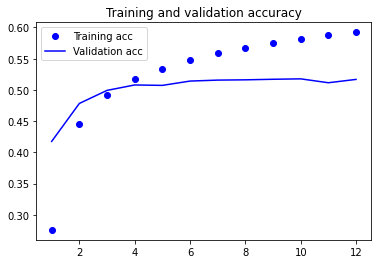

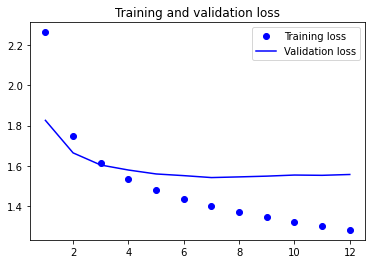

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Saving and Using The Model LSTM
## Long Short Term Memory

In [ ]:
from keras.models import load_model
model.save('ltsm.h5') 

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/data_for_colab/keras.h5') 